In [166]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move
from pocket_cube.astar import astar

import time

%matplotlib inline

# Creating a scrambled cube 

In [167]:
cube = Cube("F' R U R U F' U'")

## 2D Cube visualization 

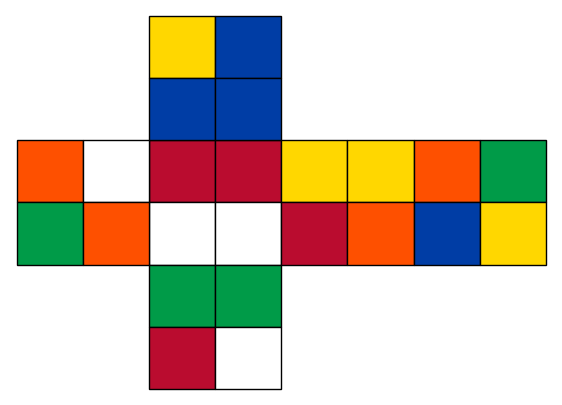

In [168]:
cube.render()

## Text representation 

In [169]:
cube.render_text()

  YB
  BB
OWRRYYOG
GOWWROBY
  GG
  RW


## 3D Cube visualization

For an interactive view of the cube, don't forget to use `%matplotlib notebook`

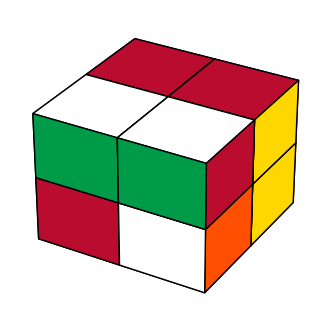

In [170]:
cube.render3D()

# Creating an unscrambled cube 

In [171]:
cube = Cube(scrambled=False)

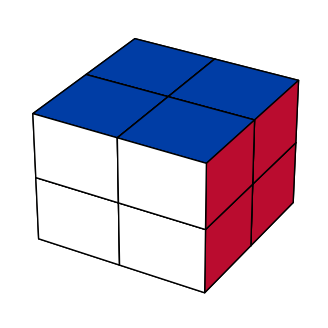

In [172]:
cube.render3D()

## Applying moves on the cube 

In [173]:
cube.scramble()

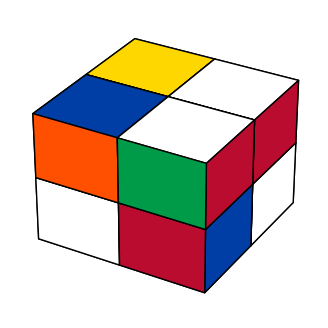

In [174]:
cube.render3D()

#A* Algorithm

In [175]:
def apply_solution(cube, solution_moves):
    """Apply the solution moves to the cube."""
    for move in solution_moves:
        cube.state = Cube.move_state(cube.state, move)

In [176]:
# Run A* algorithm with the defined heuristic
cube_copy = cube.clone()
start_time = time.time()
solution, moves = astar(cube_copy)
end_time = time.time()

# Print the solution and the number of iterations
print("Solution:", [Move(move) for move in solution])
print("Number of moves:", moves)
# Print the execution time
print("Execution Time:", end_time - start_time, "seconds")
apply_solution(cube_copy, solution);

Solution: [<Move.R: 0>, <Move.R: 0>, <Move.U: 2>, <Move.R: 0>]
Number of moves: 43
Execution Time: 0.005182743072509766 seconds


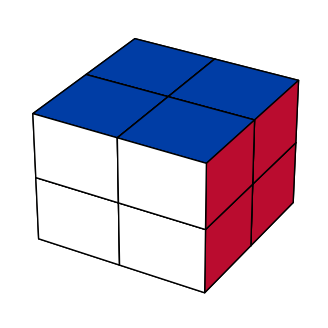

In [177]:
cube_copy.render3D()